# Exploratory Data Analysis (EDA) on  "2015 Street Tree Census Tree Data"

In [73]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [74]:
pd.set_option("display.max_columns", None)

## Stage 1: Data Loading

### Load the Dataset

In [75]:
dataset_path = "../data/2015-street-tree-census-tree-data.csv"
data = pd.read_csv(dataset_path)

### Check size of data

In [76]:
data.shape

(683788, 45)

### Explore the Data

In [77]:
data.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common steward  \
0  Alive   Fair                         Acer rubrum        red maple     NaN   
1  Alive   Fair                   Quercus palustris          pin oak     NaN   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust    1or2   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust     NaN   
4  Alive   Good                     Tilia americana  American linden     NaN   

  guards  sidewalk         user_type problems root_stone root_grate  \
0    NaN  NoDamage  TreesCount Staff      NaN         No         No   
1    NaN    Damage  TreesCount Staff   Stones        Yes         No   
2    NaN    Damage         Volunteer      NaN         No         No   
3    NaN    Damage         Volunteer   Stones        Yes         No   
4    NaN    Damage         Volunteer   Stones        Yes         No   

  root_other trunk_wire trnk_light trnk_other brch_light brch_shoe brch_other  \
0         No         No         No         No         No        No         No   
1         No         No         No         No         No        No         No   
2         No         No         No         No         No        No         No   
3         No         No         No         No         No        No         No   
4         No         No         No         No         No        No         No   

             address  postcode      zip_city  community board  borocode  \
0  108-005 70 AVENUE     11375  Forest Hills              406         4   
1   147-074 7 AVENUE     11357    Whitestone              407         4   
2  390 MORGAN AVENUE     11211      Brooklyn              301         3   
3  1027 GRAND STREET     11211      Brooklyn              301         3   
4       603 6 STREET     11215      Brooklyn              306         3   

    borough  cncldist  st_assem  st_senate   nta            nta_name  boro_ct  \
0    Queens        29        28         16  QN17        Forest Hills  4073900   
1    Queens        19        27         11  QN49          Whitestone  4097300   
2  Brooklyn        34        50         18  BK90   East Williamsburg  3044900   
3  Brooklyn        34        53         18  BK90   East Williamsburg  3044900   
4  Brooklyn        39        44         21  BK37  Park Slope-Gowanus  3016500   

      state   latitude  longitude         x_sp         y_sp  council district  \
0  New York  40.723092 -73.844215  1027431.148  202756.7687              29.0   
1  New York  40.794111 -73.818679  1034455.701  228644.8374              19.0   
2  New York  40.717581 -73.936608  1001822.831  200716.8913              34.0   
3  New York  40.713537 -73.934456  1002420.358  199244.2531              34.0   
4  New York  40.666778 -73.975979   990913.775  182202.4260              39.0   

   census tract        bin           bbl  
0         739.0  4052307.0  4.022210e+09  
1         973.0  4101931.0  4.044750e+09  
2         449.0  3338310.0  3.028870e+09  
3         449.0  3338342.0  3.029250e+09  
4         165.0  3025654.0  3.010850e+09

### Shows data types and non-null values

In [78]:
# Data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

## Stage 2: Data Cleaning

### Make common species (spc_common) names title case

In [79]:
data.spc_common = [
    data.spc_common[i].title() if v == False else data.spc_common[i]
    for i, v in enumerate(data.spc_common.isna())
]

### Review health status

In [80]:
data["health"].value_counts()

health
Good    528850
Fair     96504
Poor     26818
Name: count, dtype: int64

In [81]:
# Where status is not 'alive' fill health with 'dead'
data["health"] = [
    "Dead" if data.status[i] != "Alive" else h for i, h in enumerate(data.health)
]

In [82]:
data["health"].value_counts()

health
Good    528850
Fair     96504
Dead     31615
Poor     26818
Name: count, dtype: int64

### Analyzing missing values

In [83]:
# Counting missing values
missing_data = data.isna().sum()
missing_data = missing_data[missing_data > 0]  # Filtering columns with missing values

# Visualizing missing values with Plotly
fig = px.pie(
    missing_data,
    values=missing_data.values,
    names=missing_data.index,
    title="Percentage of missing values by columns",
)
fig.show()

### Handle missing values / First approach – drop rows with missing values

In [84]:
data_dropped = data.copy()

# Handle missing values by drop rows where health is empty
data_dropped.dropna(subset=["health"], axis=0, inplace=True)

# Other option = drop all rows with any missing values
# data_dropped.dropna(inplace=True)

data_dropped.shape

(683787, 45)

### Handle missing values / Second approach – Impute missing values

In [85]:
# Option 2: Impute missing values (consider data type and potential biases)
# Impute numerical columns with mean/median
data_imputed = data.copy()
for col in data_imputed.select_dtypes(include=[np.number]):
    data_imputed[col] = data_imputed[col].fillna(
        data_imputed[col].mean()
    )  # Replace with mean

# Impute categorical columns with mode (most frequent value)
# for col in data_imputed.select_dtypes(include=[object]):
# data_imputed[col] = data_imputed[col].fillna(data_imputed[col].mode()[0])  # Replace with mode

# Handle missing values by drop rows where health is empty
data_imputed.dropna(subset=["health"], axis=0, inplace=True)

# Other option = drop all rows with any missing values
# data_imputed.dropna(inplace=True)

data_imputed.shape

(683787, 45)

### ReCheck for missing values

In [86]:
data_dropped.isnull().sum()

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health                   0
spc_latin            31619
spc_common           31619
steward             519437
guards              603921
sidewalk             31616
user_type                0
problems            457943
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

In [87]:
data_imputed.isnull().sum()

tree_id                  0
block_id                 0
created_at               0
tree_dbh                 0
stump_diam               0
curb_loc                 0
status                   0
health                   0
spc_latin            31619
spc_common           31619
steward             519437
guards              603921
sidewalk             31616
user_type                0
problems            457943
root_stone               0
root_grate               0
root_other               0
trunk_wire               0
trnk_light               0
trnk_other               0
brch_light               0
brch_shoe                0
brch_other               0
address                  0
postcode                 0
zip_city                 0
community board          0
borocode                 0
borough                  0
cncldist                 0
st_assem                 0
st_senate                0
nta                      0
nta_name                 0
boro_ct                  0
state                    0
l

### Check for Duplicates

In [88]:
data.duplicated().sum()

0

In [89]:
# Remove duplicates
# df.drop_duplicates(inplace=True)

### Check data types

In [90]:
data.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

In [91]:
# Convert data types if needed (e.g., converting object columns to datetime or numeric) in next codereview iterations
# Example:
# df['date_column'] = pd.to_datetime(df['date_column'])
# df['numeric_column'] = pd.to_numeric(df['numeric_column'])

## Stage 3: Data Exploration / Descriptive Statistics

### Summary statistics for numerical columns

In [92]:
data_imputed.describe()

tree_id       block_id       tree_dbh     stump_diam  \
count  683787.000000  683787.000000  683787.000000  683787.000000   
mean   365205.186818  313792.951134      11.279780       0.432464   
std    208122.194354  114839.045602       8.723047       3.290243   
min         3.000000  100002.000000       0.000000       0.000000   
25%    186582.500000  221556.000000       4.000000       0.000000   
50%    366215.000000  319967.000000       9.000000       0.000000   
75%    546170.500000  404624.000000      16.000000       0.000000   
max    722694.000000  999999.000000     450.000000     140.000000   

            postcode  community board       borocode       cncldist  \
count  683787.000000    683787.000000  683787.000000  683787.000000   
mean    10916.246932       343.505170       3.358498      29.943150   
std       651.553426       115.740525       1.166745      14.328519   
min        83.000000       101.000000       1.000000       1.000000   
25%     10451.000000       302.000000       3.000000      19.000000   
50%     11214.000000       402.000000       4.000000      30.000000   
75%     11365.000000       412.000000       4.000000      43.000000   
max     11697.000000       503.000000       5.000000      51.000000   

            st_assem      st_senate       boro_ct       latitude  \
count  683787.000000  683787.000000  6.837870e+05  683787.000000   
mean       50.791567      20.615777  3.404912e+06      40.701262   
std        18.966529       7.390848  1.175863e+06       0.090311   
min        23.000000      10.000000  1.000201e+06      40.498466   
25%        33.000000      14.000000  3.011700e+06      40.631929   
50%        52.000000      21.000000  4.008100e+06      40.700612   
75%        64.000000      25.000000  4.103202e+06      40.762228   
max        87.000000      36.000000  5.032300e+06      40.912918   

           longitude          x_sp           y_sp  council district  \
count  683787.000000  6.837870e+05  683787.000000     683787.000000   
mean      -73.924059  1.005280e+06  194798.505906         30.027300   
std         0.123583  3.428494e+04   32902.016522         14.233367   
min       -74.254965  9.133493e+05  120973.792200          1.000000   
25%       -73.980500  9.896579e+05  169515.207600         19.000000   
50%       -73.912911  1.008386e+06  194560.258600         30.000000   
75%       -73.834909  1.029991e+06  217019.660200         43.000000   
max       -73.700488  1.067248e+06  271894.092100         51.000000   

        census tract           bin           bbl  
count  683787.000000  6.837870e+05  6.837870e+05  
mean    11957.355489  3.495437e+06  3.413411e+09  
std     30598.849451  1.184904e+06  1.166650e+09  
min         1.000000  1.000000e+06  0.000000e+00  
25%       205.000000  3.035179e+06  3.012030e+09  
50%       520.000000  4.012289e+06  4.006630e+09  
75%      1463.000000  4.258875e+06  4.104020e+09  
max    157903.000000  5.515124e+06  5.080500e+09

## Stage 4: Data Visualization
I will use original data set at this stage before we formulate business task

In [93]:
data["status"].value_counts()

status
Alive    652173
Stump     17654
Dead      13961
Name: count, dtype: int64

In [94]:
data["health_num"] = (
    data["health"].map({"Good": 1, "Fair": 0, "Poor": -1}).astype(float)
)
data["status_num"] = (
    data["status"].map({"Alive": 1, "Stump": 0, "Dead": -1}).astype(float)
)

In [95]:
numeric_cols = [
    "tree_dbh",
    "stump_diam",
    "x_sp",
    "y_sp",
    "bin",
    "bbl",
    "health_num",
    "status_num",
]
data_numeric = data[numeric_cols].dropna()

In [96]:
data_numeric

tree_dbh  stump_diam          x_sp         y_sp        bin  \
0              3           0  1.027431e+06  202756.7687  4052307.0   
1             21           0  1.034456e+06  228644.8374  4101931.0   
2              3           0  1.001823e+06  200716.8913  3338310.0   
3             10           0  1.002420e+06  199244.2531  3338342.0   
4             21           0  9.909138e+05  182202.4260  3025654.0   
...          ...         ...           ...          ...        ...   
683783        25           0  9.967407e+05  199121.6363  3062513.0   
683784         7           0  1.023989e+06  199873.6475  4075448.0   
683785        12           0  9.463514e+05  165466.0763  5011657.0   
683786         9           0  1.011054e+06  249271.9507  2007757.0   
683787        23           0  1.043136e+06  206095.5383  4153657.0   

                 bbl  health_num  status_num  
0       4.022210e+09         0.0         1.0  
1       4.044750e+09         0.0         1.0  
2       3.028870e+09         1.0         1.0  
3       3.029250e+09         1.0         1.0  
4       3.010850e+09         1.0         1.0  
...              ...         ...         ...  
683783  3.023690e+09         1.0         1.0  
683784  4.031810e+09         1.0         1.0  
683785  5.004080e+09         1.0         1.0  
683786  2.028120e+09         1.0         1.0  
683787  4.071360e+09         0.0         1.0  

[643069 rows x 8 columns]

### Pairwise distribution of feature

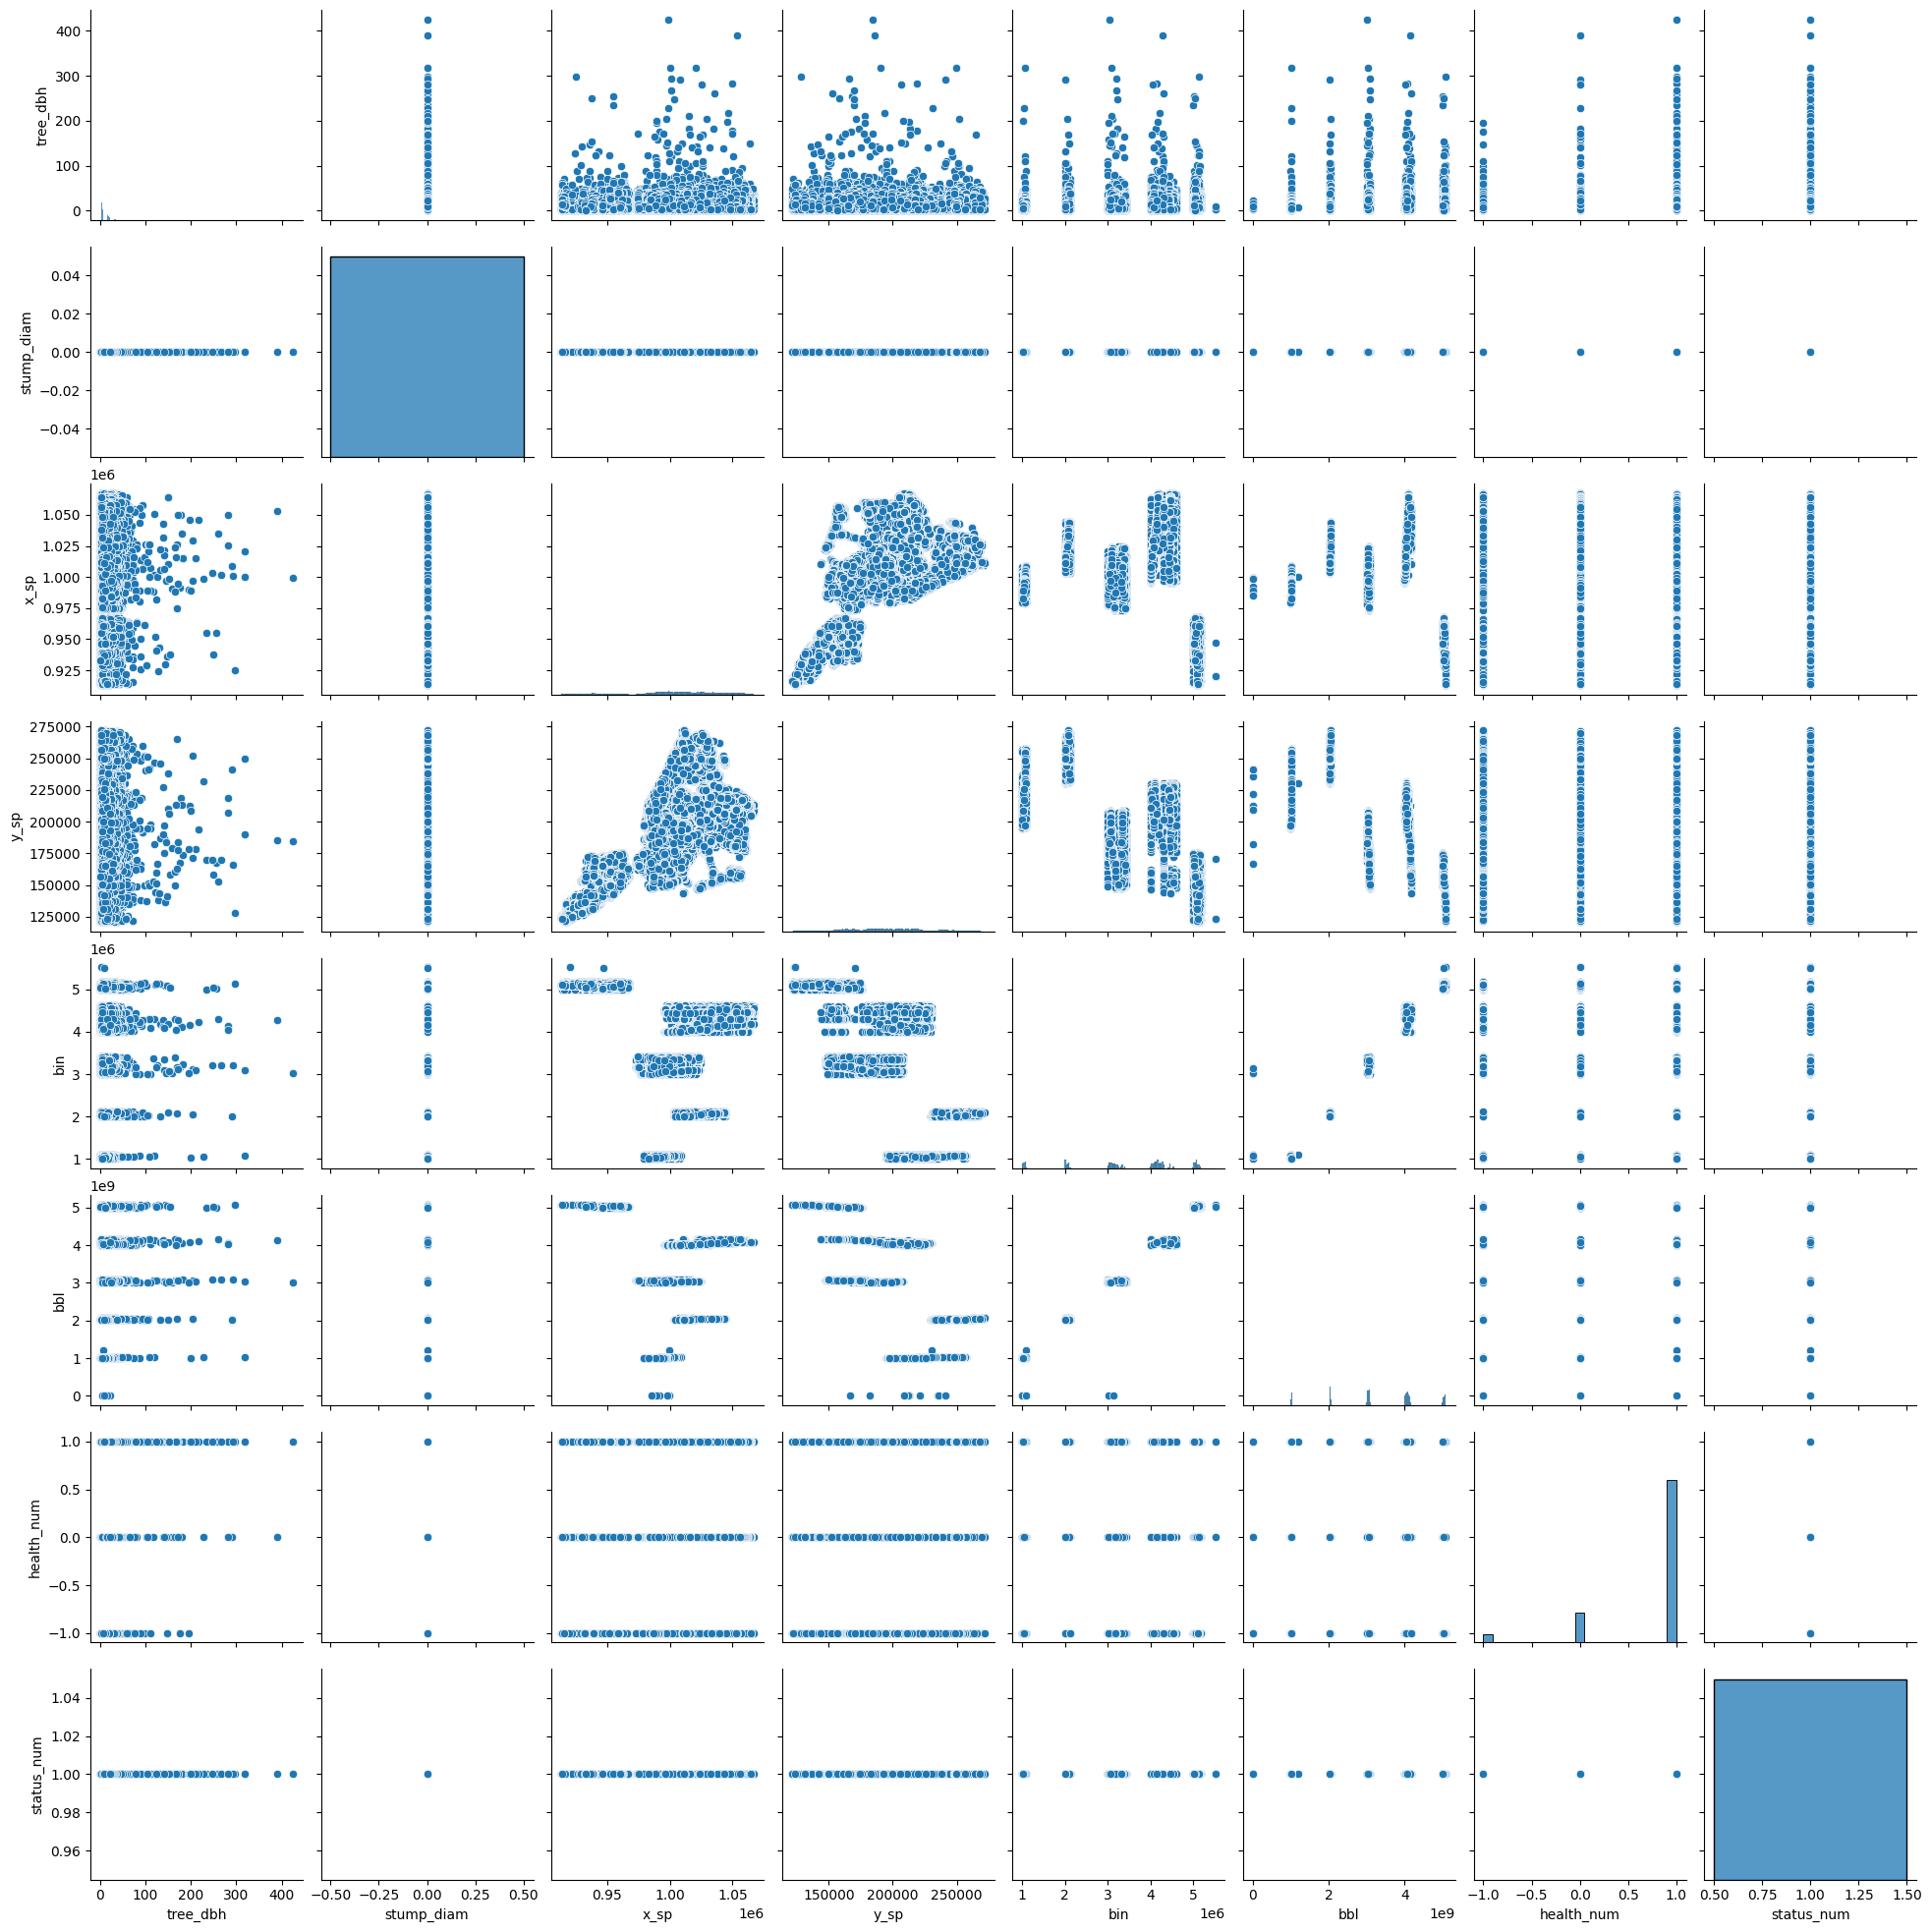

In [97]:
sns.pairplot(data_numeric)
plt.show()

### Correlation matrix by matplotlib.pyplot and all numerical features

<Axes: >

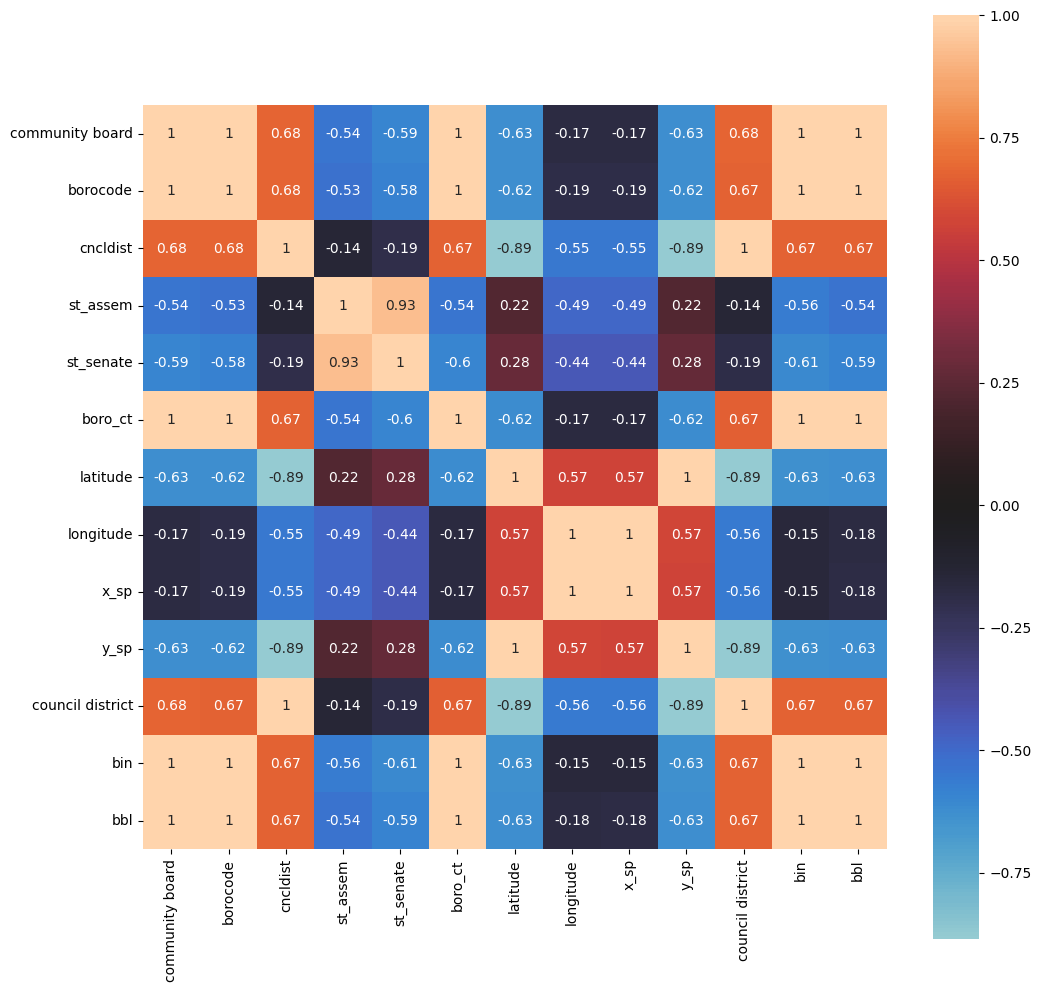

In [98]:
data_numerical = data.select_dtypes("number")
plt.figure(figsize=(12, 12))
high_corr_columns = data_numerical.columns[
    list(data_numerical.corr().apply(lambda value: value > 0.5).sum() > 1)
]
corr = data_numerical.corr().loc[high_corr_columns, high_corr_columns]
sns.heatmap(corr, square=True, center=0, annot=True)

### Correlation matrix by seaborn and some selected features

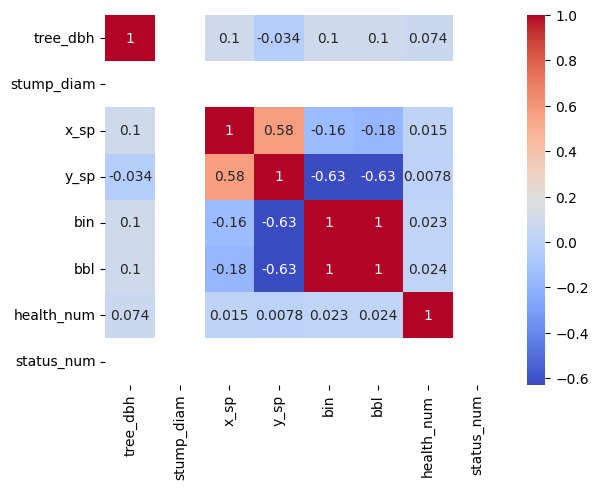

In [99]:
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

## Stage 5: Map/Locations Visualization

In [100]:
# todo later

## Stage Last: Conclusions and future directions

In [101]:
# todo later